# Modification of object properties
### Customize simulation
The aim of this session is to give a better understanding of how our solver works. 
Most of all we will present different properties of the classes. This allows to set up very individual simulations, according to the interests one might have. 

We recommend to have a look at the other example sessions in the [wiki](https://github.com/udcm-su/NTMpy/wiki) in specific at the *Getting Started* one, before one starts reading through this session. 


### General work flow

The software is set up in a way that there are 3 different classes: 
* Source **S**  
* Simulation **Sim**
* Visualization **V**

Such that  **S $\rightarrow$ Sim** $\rightarrow$ **V** 

First a source has to be defined, and then passed on as an input argument to the simulation then the simulation should be passed on as an input argument to the visualization.

In this session we will go through the properties of each class giving a brief description on how to use them and what they represent physically. 

Note that the numerical units package is not necessarily needed but we are using it here since it comes handy and better shows physical dimensions.

In [1]:
from NTMpy import NTMpy as ntm
from matplotlib import pyplot as plt
import numpy as np
import numericalunits as u
u.reset_units('SI')

In [2]:
#Creating the Source object with default configuration
s = ntm.source()

In order to access the properties of this class one can execute `s.getProperties()`.

In [3]:
s.getProperties()

spaceprofile               TMM
timeprofile           Gaussian
fluence                      0
t0                           0
FWHM                     False
loadData                 False
multipulse               False
frequency                False
num_of_pulses            False
adjusted_grid            False
dt0                      False
extra_points               200
theta_in                     0
lambda_vac               False
polarization                 p


The default options for the `spaceprofile = "TMM"`, i.e. Transfer matrix method to calculate the absorption in space. That is multiple reflections on the layer boundaries as well as different incident angles and the wavelength of the laser are under consideration. 

For the `timeprofile = "Gaussin"` is the default option.
I.e. a gaussian distribution around $t_0$ of the amplitude with respect to the time dimension.
For the space dimension we are considering Lambert Beer´s law. That is an exponential decay in space. 

* `spaceprofile` lets the user select one out of two absorption options:  `"TMM"` or `"LB"`. Where "LB" stands for the Lambert Beer law. (Exponetially decaying according to 1/optical penetration depth)
* For the `timeprofile` we independently select an option from: `"Gaussian"`, `"repGaussian"` or `"Custom"`
* `"repGaussian"` takes a series of repeated pulses under consideration. 
* `"Custom"` allows the user to provide the software with their own data in order to simulate the shape of the heating source in time, see the example *Custom time source* in the [wiki](https://github.com/udcm-su/NTMpy/wiki).


* `fluence` is a number and determines the fluence (Energy/Area) of the laser, responsible for the heating. Typically given in mJ/cm^2


* `t0` is the time around which the Gaussian is centered (in s). It is a number.

* `FWHM`is the width of the Gaussian, i.e. at which length is the amplitude half (in m). It is a number

Note, that in the program the Gaussian source is characterized with respect to the fluence and FullWidthHalfMax. 
Therefor in the program we compute: 

* $A = \frac{\mathcal{F}}{\sqrt{2\pi\sigma^2}}$ , where $\mathcal{F}$ is the fluence $\left(\frac{J}{m^2}\right)$
* $\sigma^2 = \frac{\mathcal{FWHM}^2}{2log(2)}$ , where $\mathcal{FWHM}^2$ is the FullWidthHalfMax (s)


* `loadData` provide a data array with the time profile of the pulse under consideration. (Only relevant, if the option for the `timeprofile = "Custom"`)
 
* `multipulse` is an option to give multiple pulse excitations as shown [here](http://localhost:8888/notebooks/Documents/UDCM/GitHub/Properties.ipynb). It can be either `"on"` or `False`.
 
 If `multipulse = "on"`, the user can decide wether they want to give a puls frequency or set a fixed number of pulses. 
 
* `frequency` is the frequency with which the pulses should reapear (in 1/s)
 
* `num_of_pulses` is the number of pulses which should be placed between time 0 and the end of the simulation. 
 
* `adjusted_grid` is an option which injects more points in the timegrid for the simulation. 
 The use of it is shown in the *Custom time source* example in the [wiki](https://github.com/udcm-su/NTMpy/wiki). The reason why this is important is to make sure the shape of the pulse is correctly captured in time. This option is **important if pulses with small FWHM are under consideration**. 
 
* `dt0` is the $\Delta t0$, around which area one wants to inject an extra time grid. (in s). Only works if `adjusted_grid = "on"`. 
 
* `extra_points` defines how many extra points should be injected. This has to be an integer. Note that if it is a high number the shape of the pulse will be captured extremely well but might slow down the simulation. 

The following two parameters are only relevant if the `spaceprofile = "TMM"`. Then the user has to provide

* `lambda_vac` is the wave length in vacuum of the incident laser **given in nm!**

* `polarization` is either `"s"` or `"p"`. 


In [4]:
#Modifying the source properties
s.fluence       = 15*10 
s.FWHM          = 0.1*1e-12
s.t0            = 5*1e-12 
s.polarization  = "p"
s.theta_in      = np.pi/4   #rad (0 is grazing)
s.lambda_vac    = 400       #nm
s.getProperties()

spaceprofile               TMM
timeprofile           Gaussian
fluence                    150
t0                       5e-12
FWHM                     1e-13
loadData                 False
multipulse               False
frequency                False
num_of_pulses            False
adjusted_grid            False
dt0                      False
extra_points               200
theta_in            0.7853981633974483
lambda_vac                 400
polarization                 p


Next we will have a look at the simulation class.
In order to initialize it we will have to give two input arguments: 
`sim = simulation(number of systems, source object)`
where `number of system` can be either
* 1 => only the electron system will be taken under consideration
* 2 => electron and lattice system will be taken into consideration
* 3 => electron - lattice - spin

In [5]:
#1 Temperature model: Set up simulation
sim = simulation(1,s)
sim.getProperties()

temp_data           Temperature
num_of_temp                  1
start_time                   0
final_time                  10
time_step                   []
left_BC                      0
right_BC                     0
stability_lim       [270, 3000]
temp_data_Lat               []
temp_data_Spin              []
source                  Source


We can see that currently the `num_of_temp` is set to 1. (Only electron system will be under consideration). 

Other than that we can modify 
* `start_time` = starting time of simulation in s
* `final_time` = ending time of the simulation in s
* `time_step`  = if someone wants to use a specific time step in the simulation. If no specific time step is given, the program will automatically do an estimate for the stability  region in the explicit euler loop and choose a time step accordingly. If the user is interested in the fast dynamics in specific then it is recommended to choose a time step well below the stability limit. 
* `left_BC` = boundary condition on the left end of the space grid. That is $T(x = 0,t) = f(t)$. I.e. the value at the left end of the entire material under consideration is fixed for all times. Note: $f(t)$ can be a `lambda` function (`sim.left_BC = lambda x: 2+x**2`) or simply a constant (`sim.left_BC = 0).
 * `right_BC` = boundary condition on the right end of the space grid. that is $T(x = L, t) = g(t)$
 
 An alternative way to modify the boundary conditions using the `changeBC_Type()` and the `changeBC_Value()`- functions, is shown [here](https://nbviewer.jupyter.org/github/udcm-su/heat-diffusion-1D/blob/master/Examples/BCN1.ipynb)

    Arguments:
                1. Number of subsystem to be considered (int)
                2. Side where we want to modify the BC. ("left", "right")
                3. Which type of BC to be considered ("neumann", "dirichlet")
                3. --> For `changeBC_value`: value to change it to. (either a function or a constant)
 `
    sim.changeBC_Type(1,"left","dirichlet")
    sim.changeBC_Type(1,"right","neumann")
    sim.changeBC_Value(1,"left",0)
    sim.changeBC_Value(1,"right",0)
 `
 
* `stability_lim` is a parameter which is used to determine the stability limit. It should reach from the expected minimum temperature of the sample to the expected maximum temperature. The input has to be a list and the temperature should be given in K. 
 
The more specific simulation parameters for the electron system are accessible in 
`sim.temp_data.getProperties`. (Note that the lattice system has not been initialized, since `num_of_temp = 1`, therefore the parameter `temp_data_Lat`, corresponding to lattice specific simulation parameters is currently empty.)

In [6]:
sim.temp_data.getProperties()

plt_points                  30
length                   [0 0]
Left_BC_Type                 1
Right_BC_Type                1
init                <function temperature.__init__.<locals>.<lambda> at 0x0000025B131E11E0>
n                   [1.+0.j 1.+0.j]
conductivity               [1]
heatCapacity               [1]
rho                        [1]
collocpts                   12
setup                    False


* `plt_points` corresponds to the number of points per layer in the plot. (The more, the higher the more points get interpolated between the actual solutions.)
* `length` is the length of each layer (in m) 
* `Left_BC_Type` and `Right_BC_Type` corresponds to the two different types of boundary conditions we are considering, as mentioned above: 

    `left_BC_Type = "0"` => Dirichlet boundary condition. The temperature at the left/right end is know and fixed for all times. Note, to modify this option it is more easy to follow the instructions given above.
    
    $T(x=0,t) = f(t)$ for the left- or $T(x=L,t) = g(t)$ for the right hand side.
    
    `left_BC_Type = 1` => Neumann boundary condition. The temperature flux at the left/right end is know and fixed for  all times. 
    
    $\frac{\partial T(x=0,t)}{\partial x} = f(t)$ for the left- or $\frac{\partial T(x=L,t)}{\partial x} = f(t)$ for the right hand side.
    
Note that further information can be found [here](https://nbviewer.jupyter.org/github/udcm-su/heat-diffusion-1D/blob/master/Examples/BCN1.ipynb)
    
* `init` is the initial condition of the system. It can be a lambda function `sim.temp_data.init = lambda x : 1+x` or a constant `sim.temp_data.init = 300` K (setting it to room temperature.) However, we recommend to use the `sim.changeInit(systemnumber,function(x))` change init function.
* `conductivity` is the conductivity $k_i(T)$ of each layer. (in $\frac{W}{mK}$) 

    It can be a constant value, over the entire layer (in space), or a lambda function with respect to the temperature $T$.
    
The following parameters are modified by `sim.addLayer(length,n_index,[k],[C_e],density)` and so represent the corresponding parameters of the layer stack under consideration. 

* `heatCapacity` is the heat capacity $C_i(T)$ of each layer. (in $\frac{J}{kgK}$)

    it can be a constant value, over the entire layer, or a lambda function with respect to the temperature $T$.
* `rho` is the density $\rho_i$ of each layer. It is a constant. (in $\frac{kg}{m^3}$)

* `collocpts` is the number of collocation points used to approximate the solution in space. In between those the the solution gets interpolated. If one wants to do simulations with high resolution in space this value can be changed by: 
`sim.temp_data.collocpts = integer`. Note that this will slow down the simulation!

Note that each parameter can be changed for the electron and for the lattice system individually. 
To add the parameters one can simply use the `sim.addLayer(length,refractive_index,conductivity,heatCapacity,density)`  function. 
This is the recommended way and also the way how it is shown in all the other example sessions.
    

We are now leaving the boundary conditions on default => Neumann boundary conditions and the initial temperature on default => 300K over the entire space. 

In [7]:
#Platinum
length_Pt   = 30*u.nm #Length of the Material
n_Pt        = 1.0433+3.0855j
k_el_Pt     = 73*u.W/(u.m*u.K);#Heat conductivity
rho_Pt      = 1e3*21*u.kg/(u.m**3)#Density
C_el_Pt     = lambda Te: (740*u.J/(u.m**3*u.K**2))/(1e3*21*u.kg/(u.m**3)) *Te #Electron heat capacity
C_lat_Pt    = 2.8e6*u.J/(u.m**3*u.K**2)/rho_Pt#Lattice heat capacity
G_Pt        = 1e16*25*u.W/(u.m**3*u.K)        #Lattice electron coupling constant
#Cobalt
length_Co   = 50*u.nm; 
n_Co        = 1.0454+3.2169j
k_el_Co     = 100*u.W/(u.m*u.K);
rho_Co      = 1e3*8.86*u.kg/(u.m**3)
C_el_Co     = lambda Te: (704*u.J/(u.m**3*u.K**2))/(1e3*8.86*u.kg/(u.m**3)) *Te
C_lat_Co    = 4e6*u.J/(u.m**3*u.K**2)/rho_Co
G_Co        = 1e16*93*u.W/(u.m**3*u.K)

In [8]:
#Adding parameters for two layers
sim.addLayer(length_Pt,n_Pt,[k_el_Pt,k_el_Pt],[C_el_Pt,C_lat_Pt],rho_Pt,G_Pt) #Platinum 
sim.addLayer(length_Co,n_Co,[k_el_Co,k_el_Co],[C_el_Co,C_lat_Co],rho_Co,G_Co) #Cobalt
#adjusting the time span
sim.final_time     = 50*1e-12
#setting an initial temperature for the electron system
sim.temp_data.init = 300

After we initialized and passed on the source in the very beginning we created a one temperature simulation object and have just been adding two layers, with the `.addLayer()` function, to our simulation. 
We are keeping the boundary conditions in isolator configuration on both sides, i.e.$\frac{\partial T(x=0,t)}{\partial x} = 0$ and   $\frac{\partial T(x=L,t)}{\partial x} = 0$. Corresponding to ' no heat is escaping the material'.
Also we set the initial temperature of the entire system to be 300K, i.e. room temperature. 

#### T(x,t)
In order to access $T(x,t)$ the dynamics of the temperature in time and space, one has to execute 
`[x,t,T] = sim.run()`
* `T` matrix of the temperature evolution in space and time
* `x` = x- grid. 
* `t` = time grid

In [9]:
[Te,x,t] = sim.run()

-----------------------------------------------------------
 No specific time constant has been indicated. 
 The stability region has been calculated and an appropriate timestep has been chosen.
 Timestep = 4.77e-15 s
-----------------------------------------------------------
-----------------------------------------------------------
Transfer matrix absorption profile and a Gaussian time profile is taken into account for the source.
Length of every layer has to be given in units of meter.
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 10564/10564 [00:02<00:00, 3636.93it/s]


-----------------------------------------------------------
Electron temperature heat diffusion has been simulated.
Eleapsed time in E.E.- loop: 2.9240221977233887
-----------------------------------------------------------


Now the matrix `T` contains all the information on the system and together with the `x` and `t` grid one can be visualize the result in many different ways. 


In order to make this easier, we have a few pre made visualization tools. 

The visual object can be created, using the simulation object as an input argument. 

In [10]:
v = visual(sim)

------------------------------------------------------------
The simulation object of the 1 temerature system has been passed on to the visual class.
------------------------------------------------------------
-----------------------------------------------------------
Transfer matrix absorption profile and a Gaussian time profile is taken into account for the source.
Length of every layer has to be given in units of meter.
-----------------------------------------------------------


100%|██████████████████████████████████████████████████████████████████████████| 10564/10564 [00:02<00:00, 3781.40it/s]


-----------------------------------------------------------
Electron temperature heat diffusion has been simulated.
Eleapsed time in E.E.- loop: 2.800288200378418
-----------------------------------------------------------


Plotting the source we created in the beginning. 

-----------------------------------------------------------
Transfer matrix absorption profile and a Gaussian time profile is taken into account for the source.
Length of every layer has to be given in units of meter.
-----------------------------------------------------------


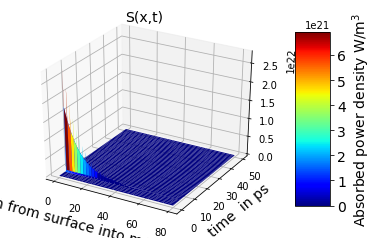

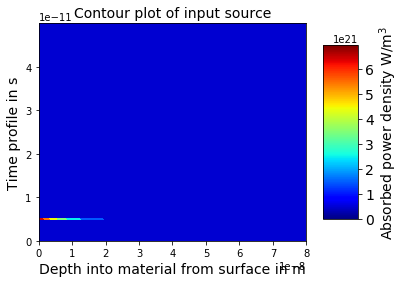

In [11]:
#output of v.source is the full matrix of the source(x,t)
so = v.source()

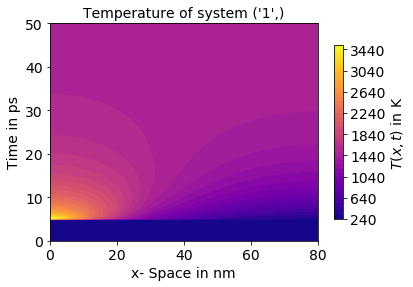

In [12]:
#A contour plot of the dynamics
v.contour('1')

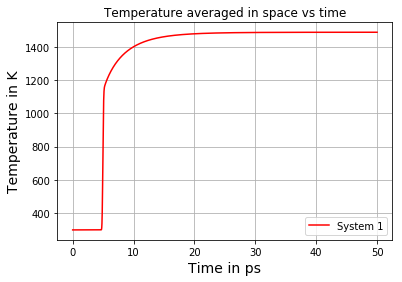

In [13]:
#weighted average in space
[tt,avT] = v.average()

Simulation of a 1-temperature system


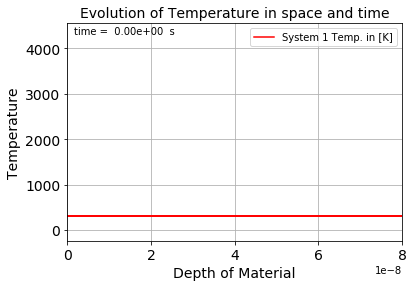

In [14]:
#An animation of the dynamics. 
#where the input argument is an integer and corresponds to the speed of the animation
v.animation(1)

## Premade visualization functions

* `[T,R,A,absorption,xflat,grid] = v.loalAbsorption()` This will show the local absorption profile of the source in the material. And give back values like the total transmission `T`, the total reflectance `R` and absorption `A`. The absorption profile $a(t)$ can be plottet against `xflat`.  

* `[so] = v.source()` shows a 3D- plot of the injected heat and gives back an array of how much heat is injected in time and space. 

* `contour("systemnumber")`, where systemnumber is a string and can be `"1"`, `"2"` or `"3"`. 

* `[t,avT] = v.average()`
